In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ibm-hr-analytics-attrition-dataset/WA_Fn-UseC_-HR-Employee-Attrition.csv


**Name : Pratiksha Yadav**

**Dataset : IBM HR Analytics Employee Attrition & Performance**

Read csv

In [2]:
empl = pd.read_csv('/kaggle/input/ibm-hr-analytics-attrition-dataset/WA_Fn-UseC_-HR-Employee-Attrition.csv')
empl.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


columns, .info, .dtype, .select_dtypes('object'), .select_dtype('int64'), .describe, isnull, duplicates, dropping columns = [over18, employee count, standard Hours, employeenumber

In [3]:
empl.shape

(1470, 35)

In [4]:
empl.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [5]:
empl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [6]:
empl.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

Drop columns

In [7]:
empl.drop(['Over18', 'EmployeeCount', 'StandardHours', 'EmployeeNumber'],axis=1,inplace=True)

Here some columns are unnecessary becuase their values does not affect the analysis

Over18 : The min age is 18 which says that all employee are Adult.

EmployeeCount & StandardHours : all values present are same

EmployeeNumber : id of employee that their values do not affect the analysis

In [8]:
cat_data = empl.select_dtypes('O')
cat_data.head()

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime
0,Yes,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Yes
1,No,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,No
2,Yes,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Yes
3,No,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Yes
4,No,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,No


In [9]:
num_data = empl.select_dtypes('number')
num_data.head()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,2,2,94,3,2,4,5993,...,3,1,0,8,0,1,6,4,0,5
1,49,279,8,1,3,61,2,2,2,5130,...,4,4,1,10,3,3,10,7,1,7
2,37,1373,2,2,4,92,2,1,3,2090,...,3,2,0,7,3,3,0,0,0,0
3,33,1392,3,4,4,56,3,1,3,2909,...,3,3,0,8,3,3,8,7,3,0
4,27,591,2,1,1,40,3,1,2,3468,...,3,4,1,6,3,3,2,2,2,2


In [10]:
empl.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.0,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.0,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.0,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.0,3.0,4.00,5.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.0,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.0,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.0,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.0,2.0,3.00,5.0
JobSatisfaction,1470.0,2.728571,1.102846,1.0,2.0,3.0,4.00,4.0
MonthlyIncome,1470.0,6502.931293,4707.956783,1009.0,2911.0,4919.0,8379.00,19999.0


Attrition and OverTime column is highly biased towards No category.

BusinessTravel Attribute is highly biased towards Travel_Rarely category

Performance Rating is highly biased towards Excellent category

check null values

In [11]:
empl.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

None of the Attribute are having Missing Values

In [12]:
empl.duplicated().sum()

0

There are no duplicate present in the dataset

In [13]:
empl['EnvironmentSatisfaction'] = empl['EnvironmentSatisfaction'].replace({1:'Low',2:'Medium',3:'High',4:'Very High'})
empl['JobInvolvement'] = empl['JobInvolvement'].replace({1:'Low',2:'Medium',3:'High',4:'Very High'})
empl['JobSatisfaction'] = empl['JobSatisfaction'].replace({1:'Low',2:'Medium',3:'High',4:'Very High'})
empl['PerformanceRating'] = empl['PerformanceRating'].replace({1:'Low',2:'Good',3:'Excellent',4:'Outstanding'})
empl['RelationshipSatisfaction'] = empl['RelationshipSatisfaction'].replace({1:'Low',2:'Medium',3:'High',4:'Very High'})
empl['WorkLifeBalance'] = empl['WorkLifeBalance'].replace({1:'Bad',2:'Good',3:'Better',4:'Best'})
empl['Education'] = empl['Education'].replace({1:'Below College',2:'College',3:'Bachelor',4:'Master',5:'Doctor'})
empl['JobLevel'] = empl['JobLevel'].replace({1:'Entry Level',2:'Junior Level',3:'Mid Level',4:'Senior Level',5:'Executive Level'})

The values used below to label the categories is provided in the dataset description

# **Data Visualization**

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

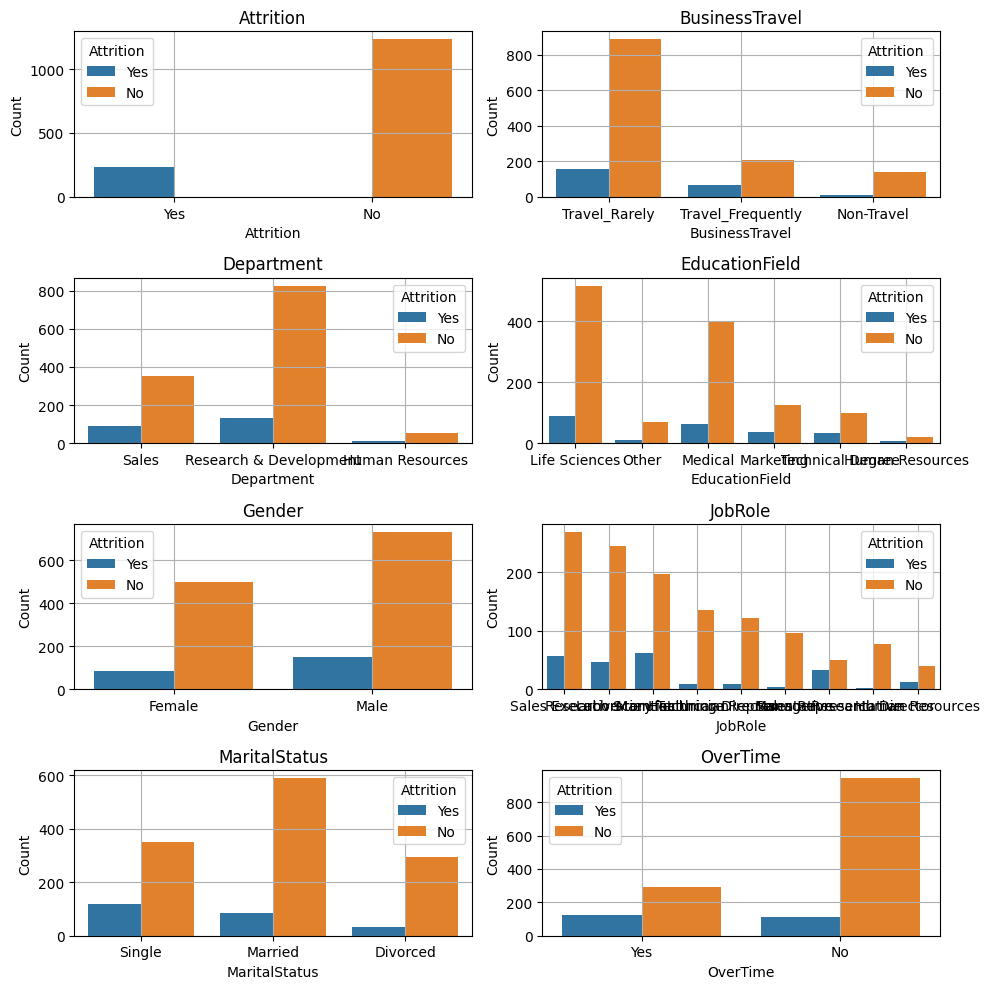

In [15]:
fig = plt.figure(figsize=(10,10))
for ind,col in enumerate(cat_data):
    
    ax = sns.countplot(x = empl[col], data = empl, hue = 'Attrition', ax=plt.subplot(4,2,ind+1))
    
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.grid(True)
    plt.tight_layout()
#     plt.show()

In [16]:
empl.groupby(['Attrition', 'OverTime'])['Age'].count()

Attrition  OverTime
No         No          944
           Yes         289
Yes        No          110
           Yes         127
Name: Age, dtype: int64

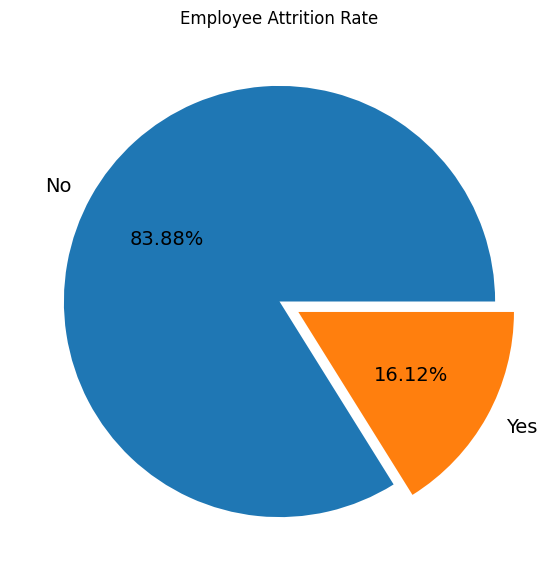

In [17]:
# Visualization to show Employee Attrition in Percentage.
attrition_rate = empl['Attrition'].value_counts()
plt.figure(figsize=(16,7))
plt.pie(attrition_rate,labels=['No','Yes'],autopct='%.2f%%',textprops={'size':14},explode=[0,0.1])
plt.title('Employee Attrition Rate')
plt.show()

The Employee Attrition rate is 16.12%.

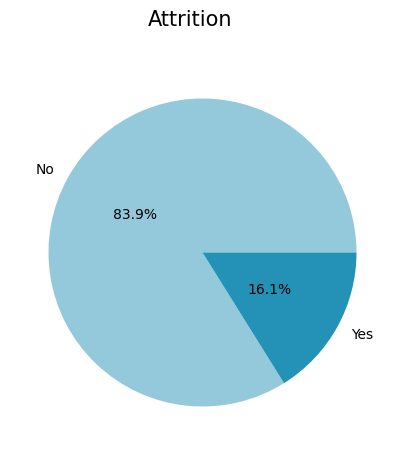

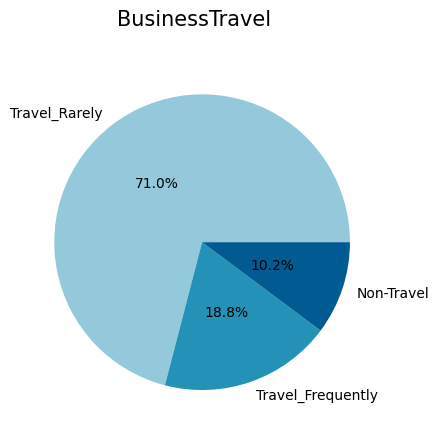

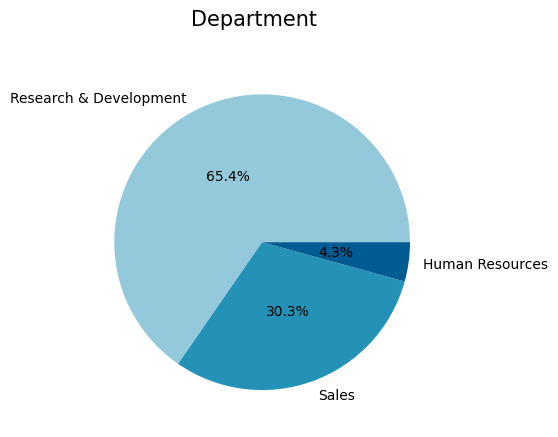

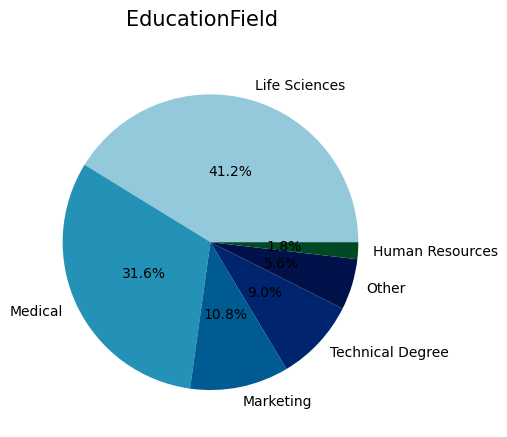

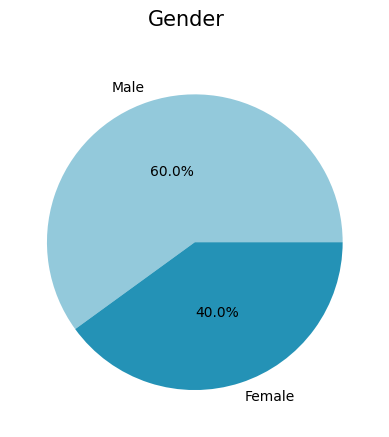

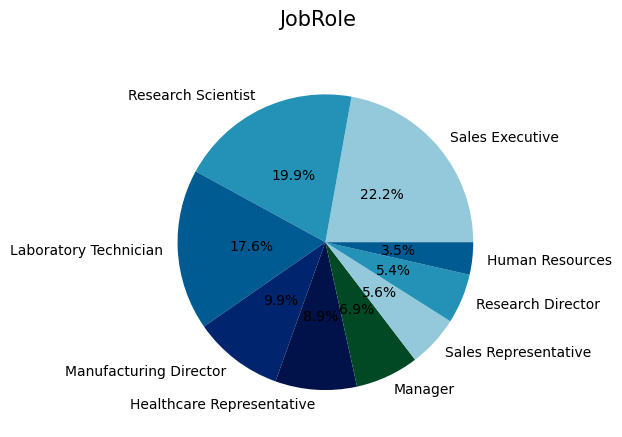

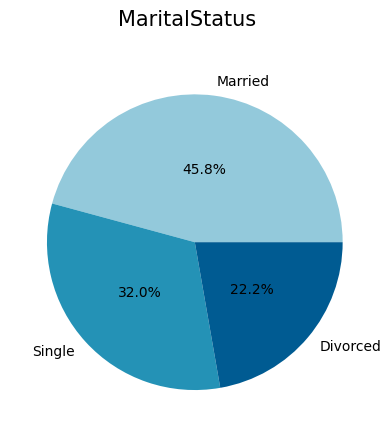

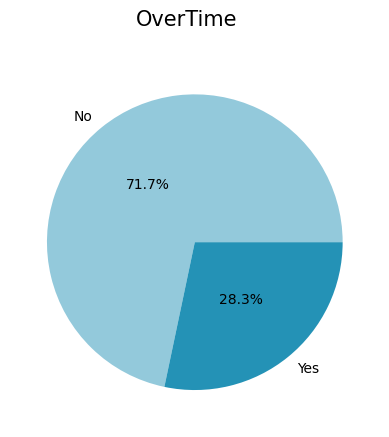

In [18]:
fig, axes = plt.subplots(figsize=(10,5))

for i, col in enumerate(cat_data):
        
    index = empl[col].value_counts().index
    size = empl[col].value_counts().values
    
    plt.pie(
        size,
        labels=index,
        autopct='%1.1f%%',
        pctdistance=0.5, 
        colors=sns.color_palette('ocean_r'),
    )
    plt.suptitle(col, fontsize=15)
    plt.show()

2. After analysing Business Travel plot Most of the employees in the organization Travel Rarely. Highest employee attrition can be observed by those employees who Travels Frequently. Lowest employee attrition can be observed by those employees who are Non-Travel

.  


5. In Gender plot Male Employee has higher proportion than Female Employees by more than 20%. Attrition in male is higher as compared to employees.

7. By analysing Marital status plot Most of the employees are Married in the organization.



In [19]:
cat_data.head()

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime
0,Yes,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Yes
1,No,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,No
2,Yes,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Yes
3,No,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Yes
4,No,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,No


In [20]:
num_data.head(2)

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,2,2,94,3,2,4,5993,...,3,1,0,8,0,1,6,4,0,5
1,49,279,8,1,3,61,2,2,2,5130,...,4,4,1,10,3,3,10,7,1,7


In [21]:
empl.JobSatisfaction.nunique()

4

In [22]:
empl['JobSatisfaction'].value_counts()

JobSatisfaction
Very High    459
High         442
Low          289
Medium       280
Name: count, dtype: int64

In [23]:
(empl.groupby(['JobSatisfaction', 'Department'])['Attrition'].count()).reset_index()

,JobSatisfaction,Department,Attrition
0,High,Human Resources,15
1,High,Research & Development,300
2,High,Sales,127
3,Low,Human Resources,11
4,Low,Research & Development,192
5,Low,Sales,86
6,Medium,Human Resources,20
7,Medium,Research & Development,174
8,Medium,Sales,86
9,Very High,Human Resources,17


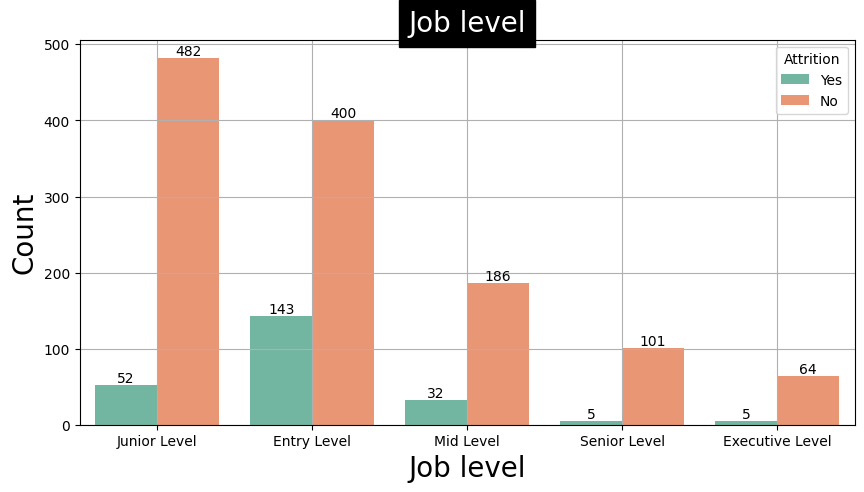

In [24]:
fig = plt.figure(figsize=(10, 5))

# Create a countplot of the JobLevel column with Attrition as the hue
ax = sns.countplot(x="JobLevel", data=empl, hue="Attrition", palette='Set2')

# Add bar labels to the countplot
for container in ax.containers:
    ax.bar_label(container)

# Set the title, labels, and grid
plt.title("Job level", backgroundcolor='black', color='white', fontsize=20)
plt.xlabel("Job level", fontsize=20)
plt.ylabel('Count', fontsize=20)
plt.grid(True)

# Show the plot
plt.show()

In [25]:
def bar_plot(empl,hue):
    fig = plt.figure(figsize=(10,10))
    x = ['EnvironmentSatisfaction','JobSatisfaction','WorkLifeBalance','RelationshipSatisfaction','PerformanceRating','OverTime']
    for ind,i in enumerate(x):
        value_counts = empl[i].value_counts().sort_values()
        new_empl = empl[empl[hue]=='Yes']
        value1 = value_counts
        value2 = new_empl[i].value_counts().sort_index()

        sns.barplot(x = value1.index,y = value2.values, palette='Set2',ax=plt.subplot(3,2,ind+1))
        plt.tight_layout()
#         plt.show()
    


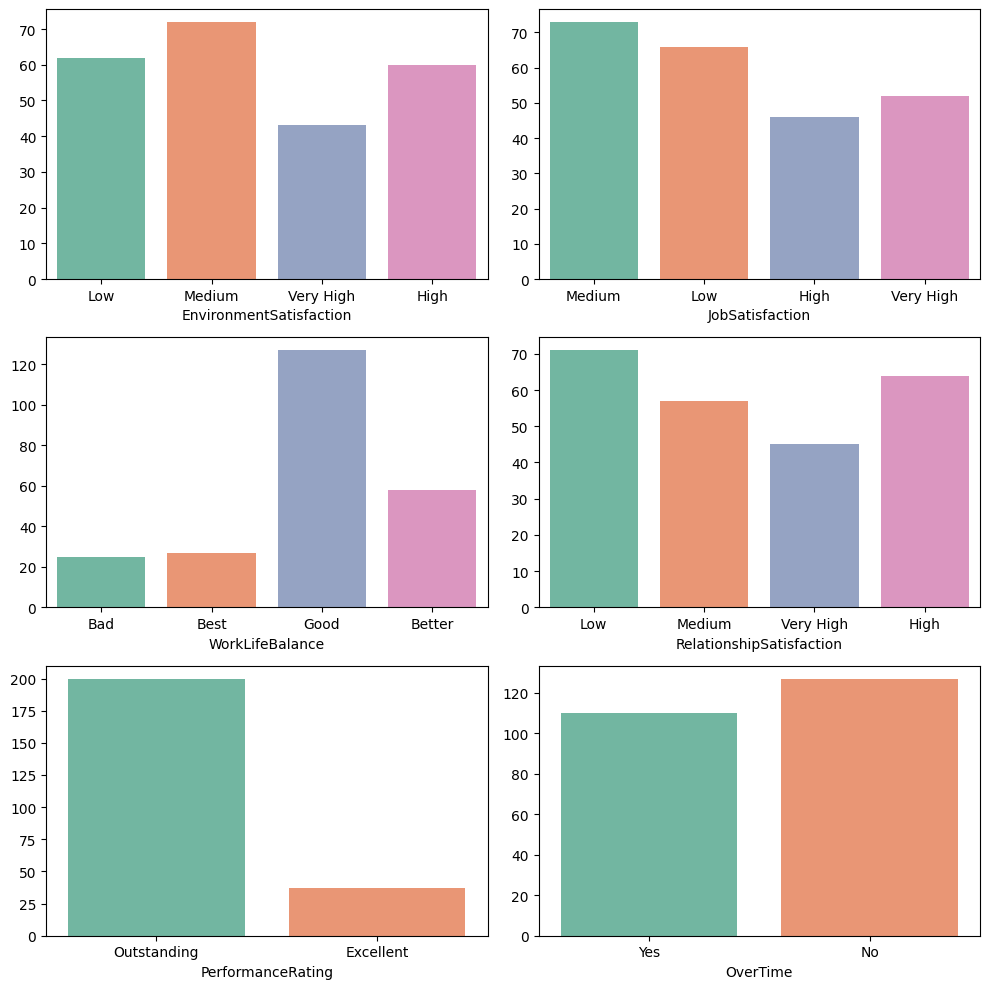

In [26]:
bar_plot(empl,'Attrition')

In [27]:
count = empl.groupby('Attrition').agg({'DistanceFromHome':'count'})

Text(0.5, 1.0, 'Average Distance from Home on Attrition')

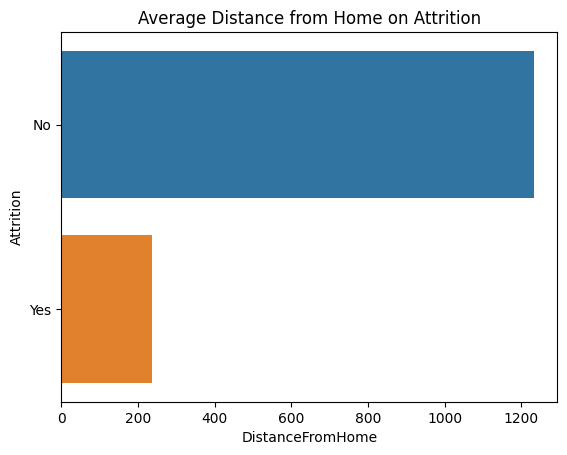

In [28]:
plt.figure()
s = sns.barplot(data = count,x='DistanceFromHome',y=count.index)
s.set_title('Average Distance from Home on Attrition')

In [29]:
daily_rate_count = empl.groupby('Attrition').agg({'DailyRate':'count'})

Text(0.5, 1.0, 'Average Daily Rate on Attrition')

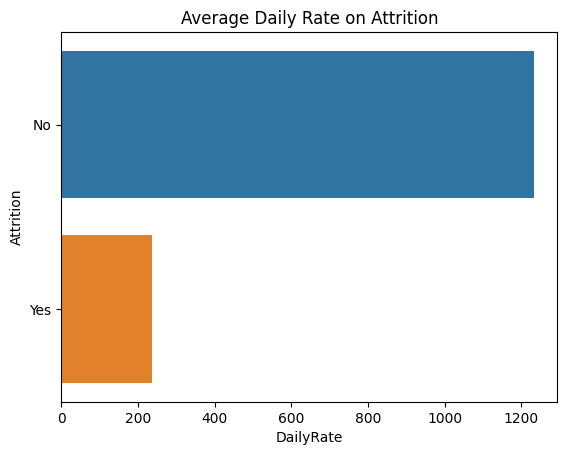

In [30]:
plt.figure()
s = sns.barplot(data =daily_rate_count,x='DailyRate',y=daily_rate_count.index)
s.set_title('Average Daily Rate on Attrition')

In [31]:
Hourly_Rate_count = empl.groupby('Attrition').agg({'HourlyRate':'count'})

Text(0.5, 1.0, 'Average Hourly Rate on Attrition')

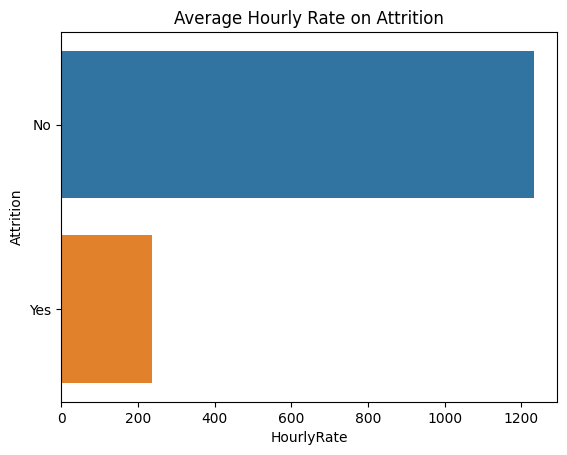

In [32]:
plt.figure()
s = sns.barplot(data = Hourly_Rate_count,x='HourlyRate',y=Hourly_Rate_count.index)
s.set_title('Average Hourly Rate on Attrition')

In [33]:
Avg_total_years = empl.groupby('Attrition').agg({'TotalWorkingYears':'mean'})

Text(0.5, 1.0, 'Average Total Working Years on Attrition')

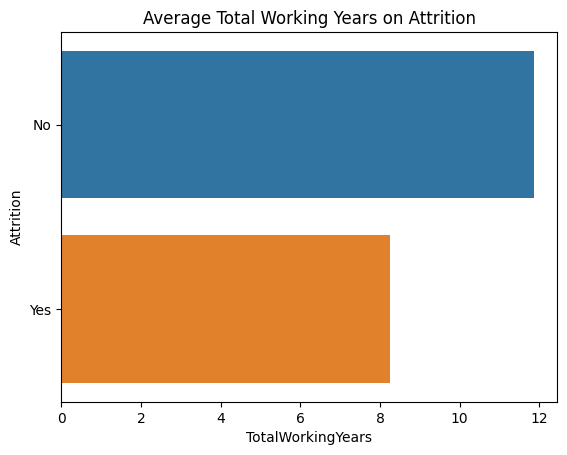

In [34]:
plt.figure()
s = sns.barplot(data = Avg_total_years,x='TotalWorkingYears',y=Avg_total_years.index)
s.set_title('Average Total Working Years on Attrition')

In [35]:
Avg_numcompworked = empl.groupby('Attrition').agg({'NumCompaniesWorked':'mean'})

Text(0.5, 1.0, 'Average Number of companies worked on Attrition')

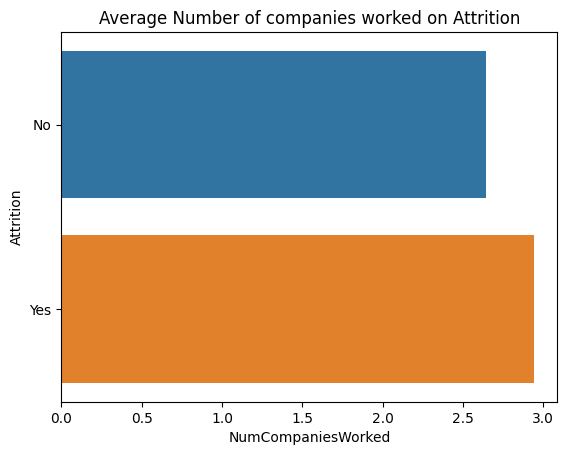

In [36]:
plt.figure()
s = sns.barplot(data = Avg_numcompworked,x='NumCompaniesWorked',y=Avg_numcompworked.index)
s.set_title('Average Number of companies worked on Attrition')

In [37]:
def hist_with_hue(empl,hue):
    plt.figure(figsize=(10,10))
    x = ['Age','DailyRate','PercentSalaryHike','YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']
    for ind,i in enumerate(x):
        sns.histplot(x=i, hue=hue, data=empl, kde=True, palette='Set2',ax = plt.subplot(4,2,ind+1))

        plt.title(f'Distribution by {i}',size=10, pad=10)

        plt.tight_layout()
#         plt.show()

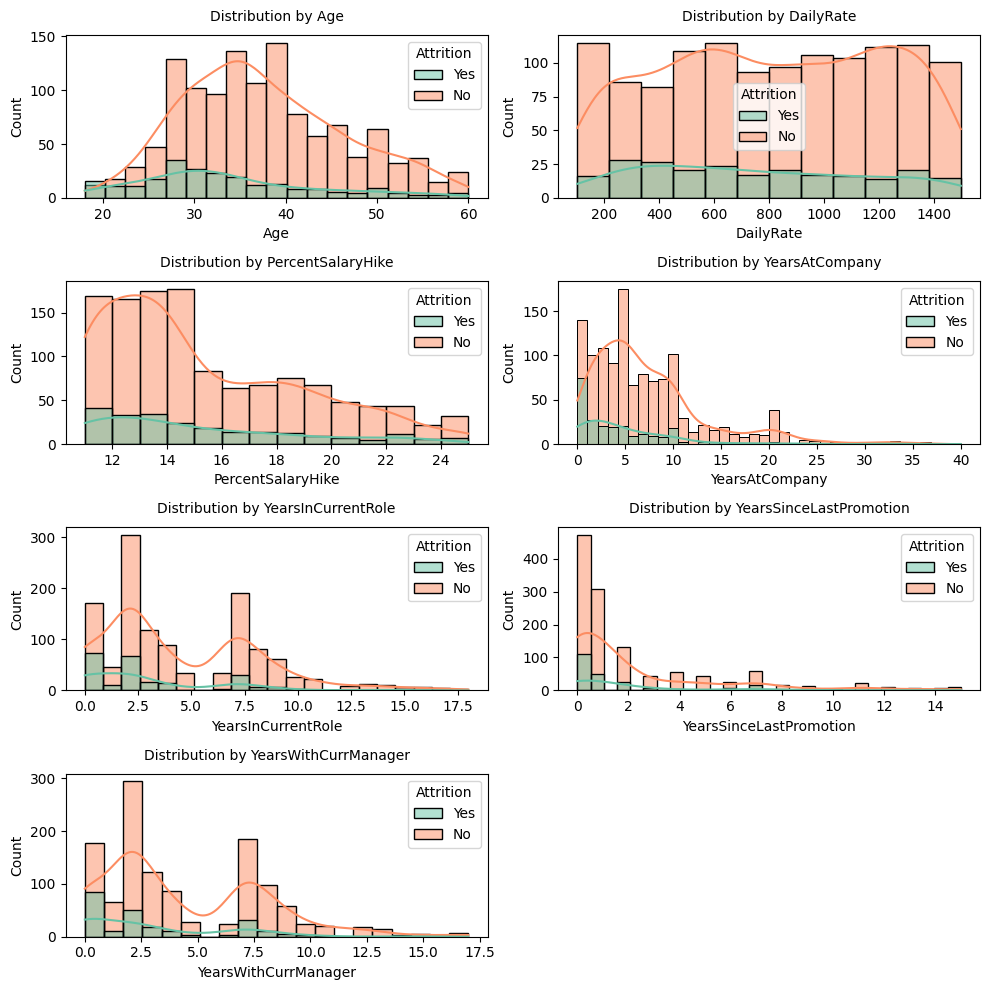

In [38]:
hist_with_hue(empl,'Attrition')

1. Distribution by Age

 attrition rate is high at age of 30, we can observed that age is increasing the attrition is decreasing.

2. Distribution by Daily Rate

 The distribution of Monthly Rate is similar througout the column.

3. Distribution by Percent Salary Hike

 As the amount of percent salary increases the attrition rate decreases.

4. Distribution by Years at Company

 Highest Attrition is in the first year of employee joing organization.

5. Distribution by Years in current years

 Highest Attrition is in the first two year of the Current Role.


In [39]:
empl

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,College,Life Sciences,Medium,Female,...,Excellent,Low,0,8,0,Bad,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,Below College,Life Sciences,High,Male,...,Outstanding,Very High,1,10,3,Better,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,College,Other,Very High,Male,...,Excellent,Medium,0,7,3,Better,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,Master,Life Sciences,Very High,Female,...,Excellent,High,0,8,3,Better,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,Below College,Medical,Low,Male,...,Excellent,Very High,1,6,3,Better,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,College,Medical,High,Male,...,Excellent,High,1,17,3,Better,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,Below College,Medical,Very High,Male,...,Excellent,Low,1,9,5,Better,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,Bachelor,Life Sciences,Medium,Male,...,Outstanding,Medium,1,6,0,Better,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,Bachelor,Medical,Very High,Male,...,Excellent,Very High,0,17,3,Good,9,6,0,8


1. Travel Frequency:

    Employees who travel frequently seem to have a higher attrition rate compared to those who travel rarely or not at all. This suggests that frequent travel may be a factor contributing to attrition.
    
2. Gender:

    While there is a higher proportion of male employees, the attrition rate in male employees is higher than in female employees. This could indicate that there might be gender-specific factors influencing attrition.
    
3. Marital Status:

    Most employees are married, but the visual doesn't explicitly indicate how marital status correlates with attrition. If there's a higher attrition rate in a specific marital status category, it could be a contributing factor.

4. Job Level:

    The countplot for job levels with attrition as hue shows that attrition is not evenly distributed across job levels. Understanding the reasons behind higher attrition in certain job levels might provide insights into areas that need attention.
    
5. Satisfaction Factors:

    Bar plots for factors like Environment Satisfaction, Job Satisfaction, Work-Life Balance, Relationship Satisfaction, Performance Rating, and Overtime suggest that employees with lower satisfaction levels in these areas might have a higher attrition rate.

6. Averaging Factors:

    The bar plots for average distance from home, daily rate, hourly rate, total working years, and the number of companies worked might indicate that certain average values are associated with higher attrition. For example, a higher average distance from home might contribute to attrition.
    
7. Age Distribution:

    The age distribution histogram shows a peak in attrition around the age of 30. This could be indicative of a mid-career attrition trend.
    
8. Years at Company and in Current Role:


9. Salary Hike:

    The distribution by percent salary hike indicates that as the percentage of salary hike increases, the attrition rate tends to decrease. This might suggest that employees are more likely to stay if they receive higher salary hikes.